##Data Storytelling to Executives

Here we have a dataset of the 74 most profitable movies from Hollywood from 2007-2011. Imagine that I'll be presenting this analysis to a board of executives that are trying to find the next big movie idea. 

What can we learn from the data?

In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns 


import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

In [2]:
#load dataset
movies = pd.read_csv('HollywoodsMostProfitableStories.csv')

In [6]:
#lets see how it looks
movies.head()

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,27 Dresses,Comedy,Fox,71.0,5.343622,40.0,160.308654,2008
1,(500) Days of Summer,Comedy,Fox,81.0,8.096000,87.0,60.720000,2009
2,A Dangerous Method,Drama,Independent,89.0,0.448645,79.0,8.972895,2011
3,A Serious Man,Drama,Universal,64.0,4.382857,89.0,30.680000,2009
4,Across the Universe,Romance,Independent,84.0,0.652603,54.0,29.367143,2007


We are given alot of different columns. Most of them seem relevant in answering the business problem. The ones that seem tge most interesting are Genre, Lead studio, Profitability, and Worldwide Gross. 

We might also look into movie ratings and does that correlate with high profitabilty/World Wide Gross

<Figure size 1080x720 with 0 Axes>

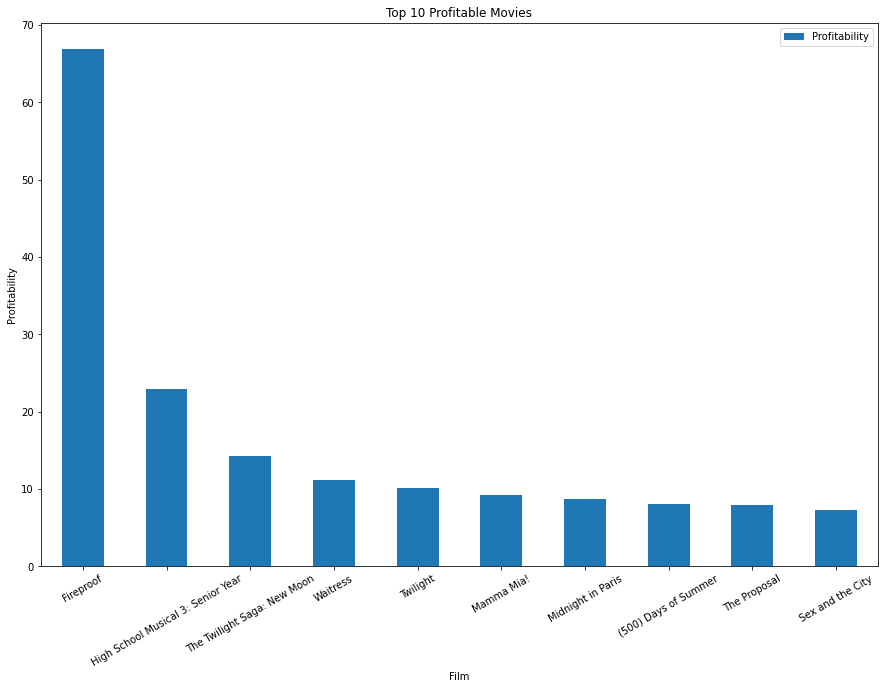

In [60]:
#top 10 movies by Profitability
plt.figure(figsize=(15,10))
movies.sort_values('Profitability', ascending = False)[:10].plot.bar(x = 'Film',y = 'Profitability', figsize = (15,10))
plt.xticks(rotation=30)
plt.ylabel('Profitability')
plt.title('Top 10 Profitable Movies')
plt.show()

Looks like Fireproof was by and large the number 1 most profitable movie from 2007-2011. 

<Figure size 1080x720 with 0 Axes>

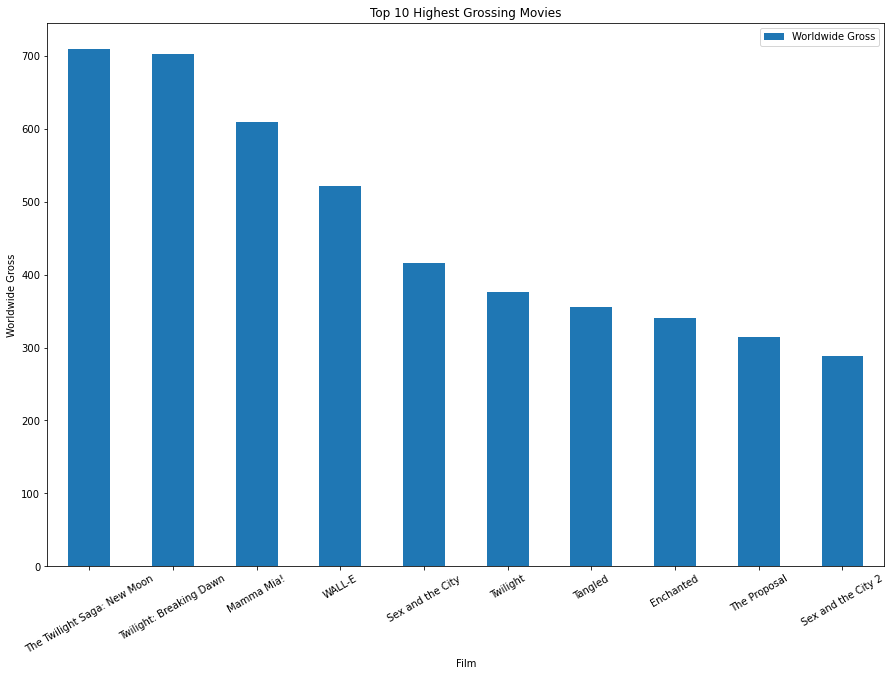

In [63]:
#Visualize top 10 movies by Worldwide Gross
plt.figure(figsize=(15,10))
movies.sort_values('Worldwide Gross', ascending = False)[:10].plot.bar(x = 'Film',y = 'Worldwide Gross', figsize = (15,10))
plt.xticks(rotation=30)
plt.ylabel('Worldwide Gross')
plt.title('Top 10 Highest Grossing Movies')
plt.show()

Worldwide gross has many similar movies. Twilight: New Moon, Mamma Mia, Sex and the City, Twilight, The Propsal, and Sex and the City 2 are present in both graphs. 

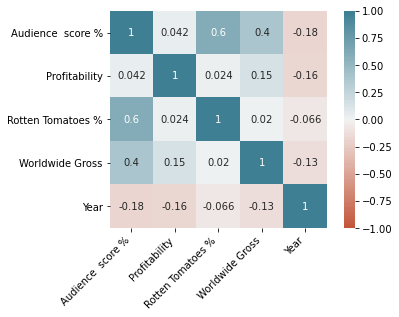

In [65]:
corr = movies.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

The heatmap shows a weak correlation of 0.15 between Worldwide Gross and Profitability. So it may just be a coincidence that many of the same movies show up in both top 10 profitable and top 10 highest grossing graph. 

Lets look at the most profitable Genre next then investigate the strong positive correlation between Rotton Tomatoes % and Audience Score % and Worldwide Gross and Audience Score %

In [12]:
#Visualize by Genre
genre_count = movies.groupby('Genre').count()

In [16]:
genre_count['Film'].sort_values(ascending = False)

Genre
Comedy       41
Romance      15
Drama        13
Animation     3
Fantasy       1
Action        1
Name: Film, dtype: int64

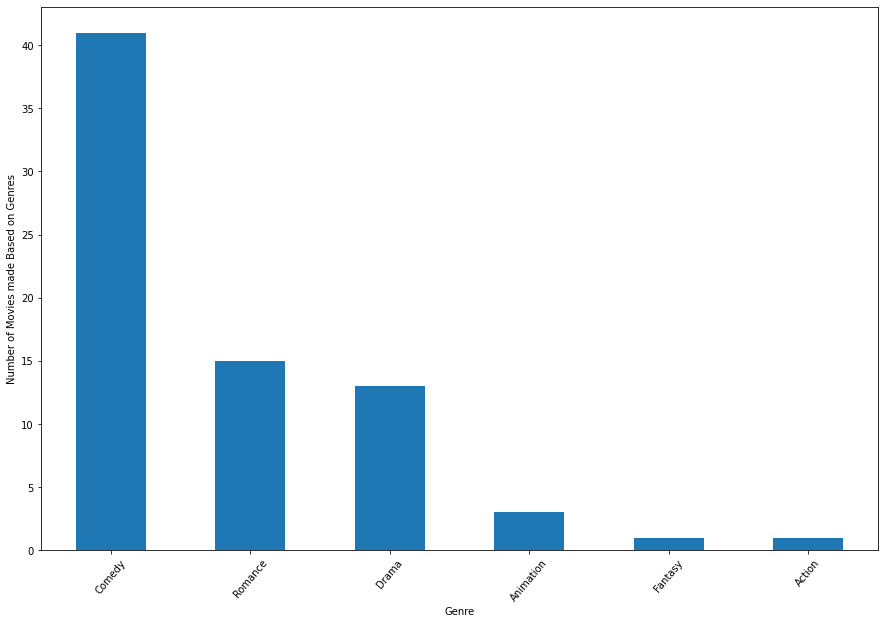

In [23]:
plt.figure(figsize=(15,10))

genre_count['Film'].sort_values(ascending = False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Genre")
plt.ylabel("Number of Movies made Based on Genres")
plt.show()

In [79]:
movies.groupby('Genre').mean()['Profitability'].sort_values(ascending = False)

Genre
Drama        8.407218
Romance      4.371398
Comedy       3.935434
Animation    3.216561
Fantasy      1.783944
Action       1.245333
Name: Profitability, dtype: float64

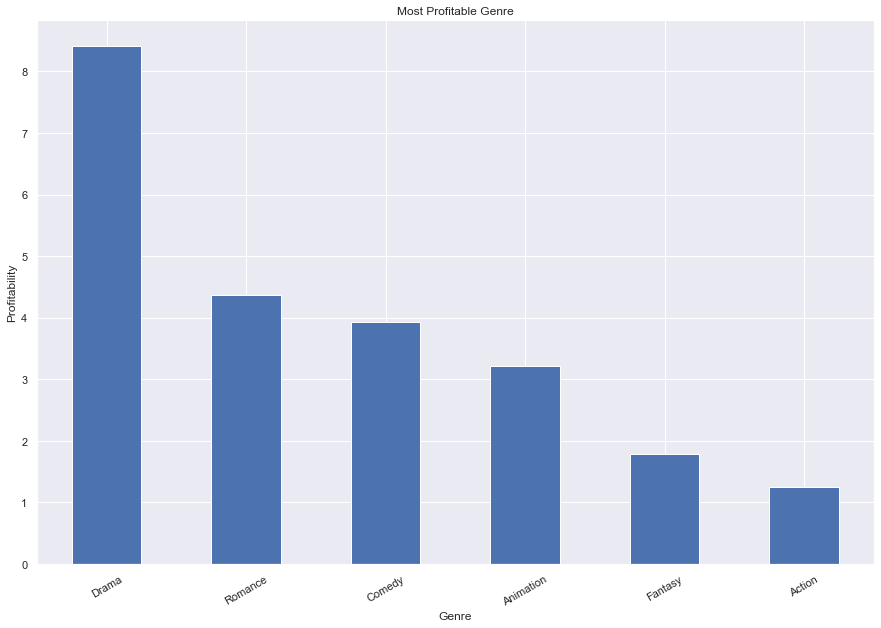

In [118]:
#Visualize Profitability
plt.figure(figsize=(15,10))
movies.groupby('Genre').mean()['Profitability'].sort_values(ascending = False).plot.bar(x = 'Genre',y = 'Profitability', figsize = (15,10))
plt.xticks(rotation=30)
plt.ylabel('Profitability')
plt.title('Most Profitable Genre')
plt.show()

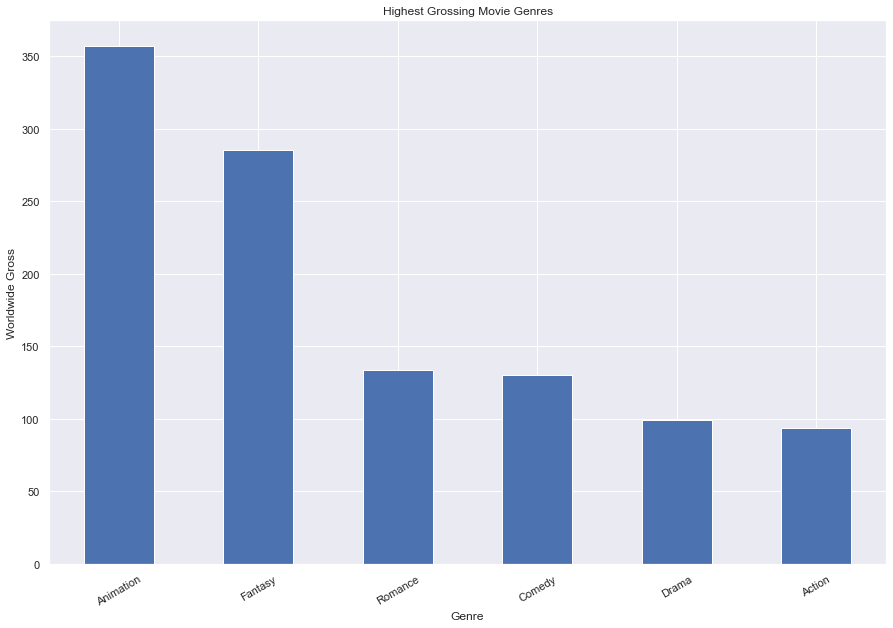

In [117]:
plt.figure(figsize=(15,10))
movies.groupby('Genre').mean()['Worldwide Gross'].sort_values(ascending = False).plot.bar(x = 'Genre',y = 'Worldwide Gross', figsize = (15,10))
plt.xticks(rotation=30)
plt.ylabel('Worldwide Gross')
plt.title('Highest Grossing Movie Genres')
plt.show()

Drama is the most profitable movie genre with romance and comedy coming in at 2nd and third. 
That might suggest that Drama, Romance, and Comedy movies cost little to make and have huge returns on average.

Animation and Fantasy are on top of the Highest Grossing movies by Genre, and rank towards the bottom on profitability. 
This shows that Animation and Fantasy movies make alot of money, but also cost alot of money to make.  

<AxesSubplot:xlabel='Rotten Tomatoes %', ylabel='Audience  score %'>

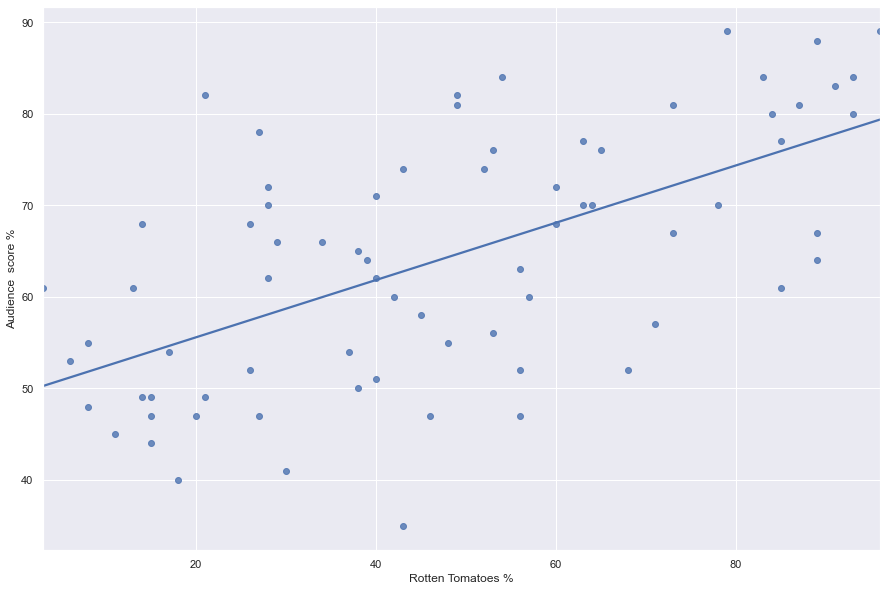

In [108]:
#Lets visualize Rotton Tomatoes % and Audience Score %

sns.set(rc={'figure.figsize':(15,10)})
sns.regplot(movies['Rotten Tomatoes %'],movies['Audience  score %'], ci = None)

C:\Users\kenne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Audience  score %', ylabel='Worldwide Gross'>

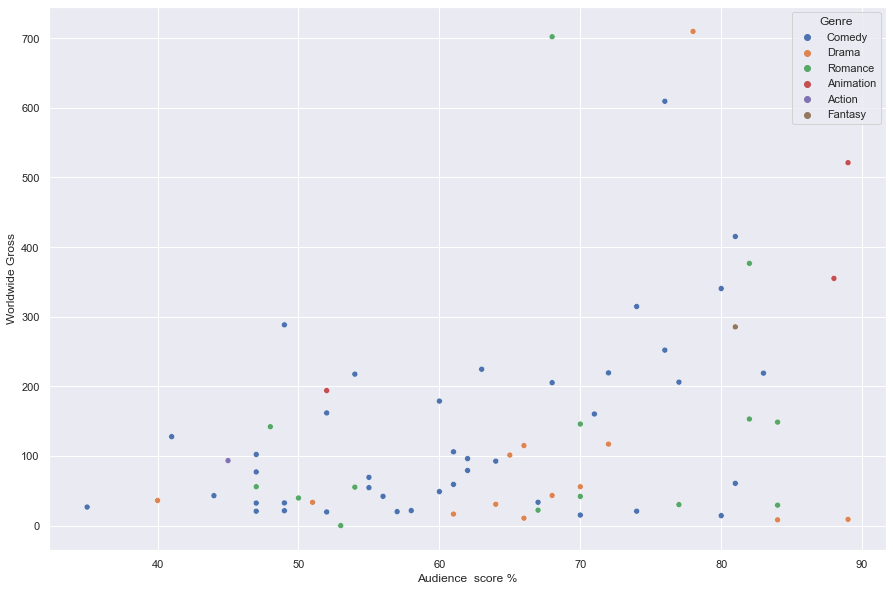

In [114]:
sns.scatterplot(movies['Audience  score %'], movies['Worldwide Gross'], hue = movies['Genre'])

Looks like there is a loose relationship between Worldwide Gross and Audience score %. Although higher rated movies have the potential to make more money, there are plenty of points on the graph where higher rated movies made around the same gross as lower rated movies

C:\Users\kenne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Audience  score %', ylabel='Profitability'>

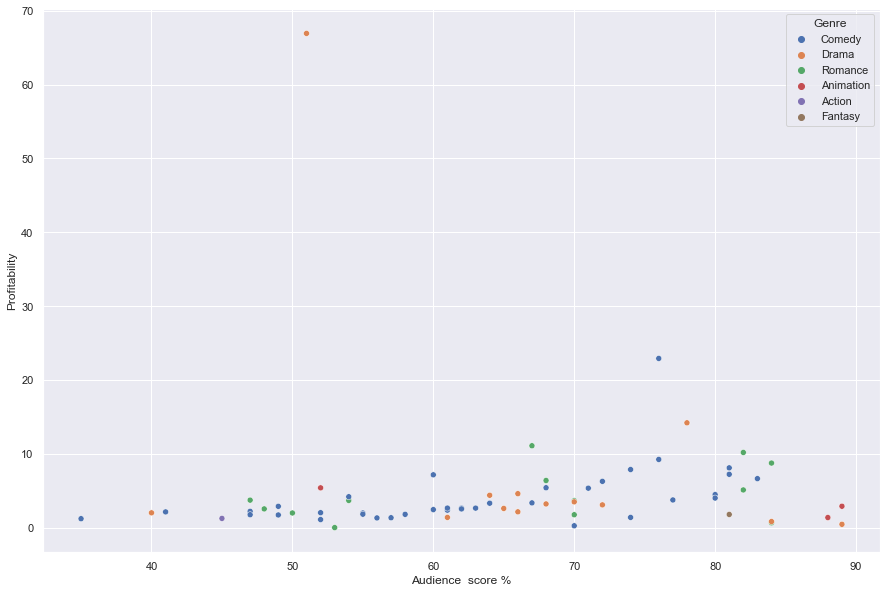

In [115]:
sns.scatterplot(movies['Audience  score %'], movies['Profitability'], hue = movies['Genre'])

With profitability vs audience score there is even less of a relationship. Again the same issue is present. Higher rated movies is not guaranteed to generate the most profit, there are some high rated movies that failed at the box office and made as much profit as lower rated movies

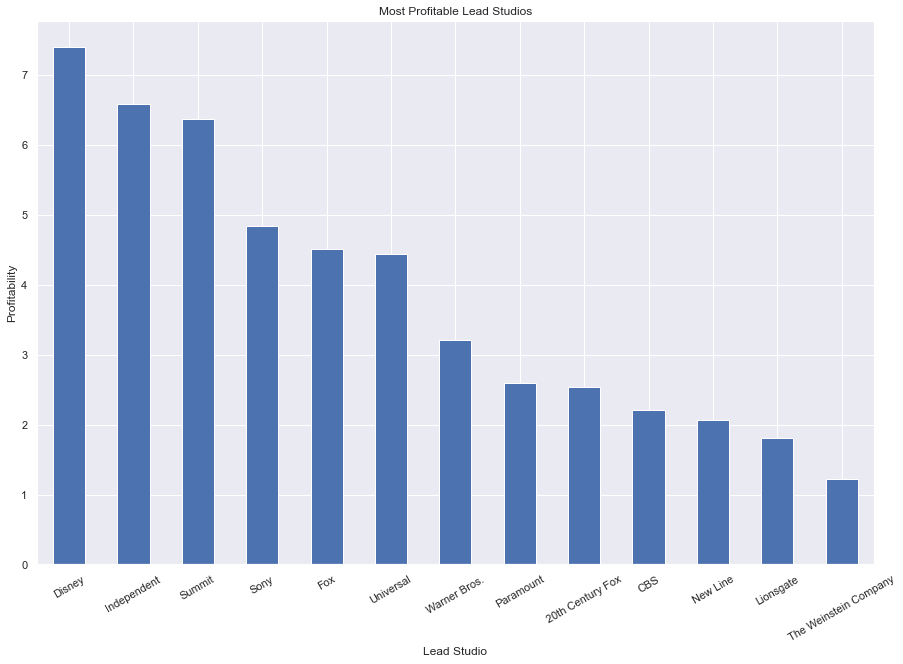

In [124]:
#Last visualization - Lead Studio and Profitability 
movies.groupby('Lead Studio').mean()['Profitability'].sort_values(ascending = False).plot.bar(x = 'Lead Studio',y = 'Profitability', figsize = (15,10))
plt.xticks(rotation=30)
plt.ylabel('Profitability')
plt.title('Most Profitable Lead Studios')
plt.show()

From our data, we can draw some interesting insights. If we are trying to figure out how to make the next hit movie, the most profitabile movies are usually in the Drama, Romance, and Comedy genre. Audience score does not have a meaningful impact on the amount of money a movie makes, and hire Disney, Independent, or Summit to make your movie.  